### Downloading market data from Yahoo and returns calculations

* Download market data for Apple and Tesla stock from Yahoo from 2001-2020
* Calculate the monthly returns for each stock
* Select only 2019 monthly returns
* Plot the monthly returns as a bar chart and then as a line chart
* Do the same thing for annual data for the full sample
* Plot daily time series of Apple and Tesla stock from 2011 onwards
    * This makes it easier to compare relative performance
    * Rebase each time series so it starts from 100

In [6]:
from findatapy.market import Market, MarketDataRequest, MarketDataGenerator
from chartpy import Chart, Style

In [5]:
md_request = MarketDataRequest(
    start_date='01 Jan 2001',
    finish_date='01 Jan 2020',
    tickers=['Apple', 'Tesla'],
    vendor_tickers=['aapl', 'tsla'],
    fields=['close', 'adj close'],
    vendor_fields=['close', 'adj close'],
    data_source='yahoo',
)

market = Market(market_data_generator=MarketDataGenerator())

df_yahoo = market.fetch_market(md_request)

2022-05-11 23:30:35,279 - findatapy.market.datavendorweb - INFO - Request Yahoo data
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
2022-05-11 23:30:36,045 - findatapy.market.datavendorweb - INFO - Completed request from Yahoo.
2022-05-11 23:30:36,063 - findatapy.market.ioengine - WARNING - Couldn't push MarketDataRequest_827__abstract_curve_key-None__base_depos_currencies-EUR_GBP_AUD_NZD_USD_CAD_CHF_NOK_SEK_JPY__base_depos_tenor-ON_TN_SN_1W_2W_3W_1M_2M_3M_4M_6M_9M_1Y_2Y_3Y_5Y__category-None__category_key-backtest_default-cat_yahoo_daily_NYC__cut-NYC__data_engine-None__data_source-yahoo__environment-backtest__expiry_date-NaT__fields-close_adj close__finish_date-2020-01-01 00:00:00__freeform_md_request-{}__freq-daily__freq_mult-1__fx_forwards_tenor-ON_TN_SN_1W_2W_3W_1M_2M_3M_4M_6M_9M_1Y_2Y_3Y_5Y__fx_vol_part-V_25R_10R_25B_10B__fx_vol_tenor-ON_1W_2W_3W_1M_2M_3M_4M_6M_9M_1Y_2Y_3Y_5Y__gran_freq-None_

2022-05-11 23:32:23,338 - matplotlib.font_manager - WARNING - findfont: Font family ['open sans'] not found. Falling back to DejaVu Sans.
2022-05-11 23:32:23,386 - matplotlib.font_manager - WARNING - findfont: Font family ['open sans'] not found. Falling back to DejaVu Sans.


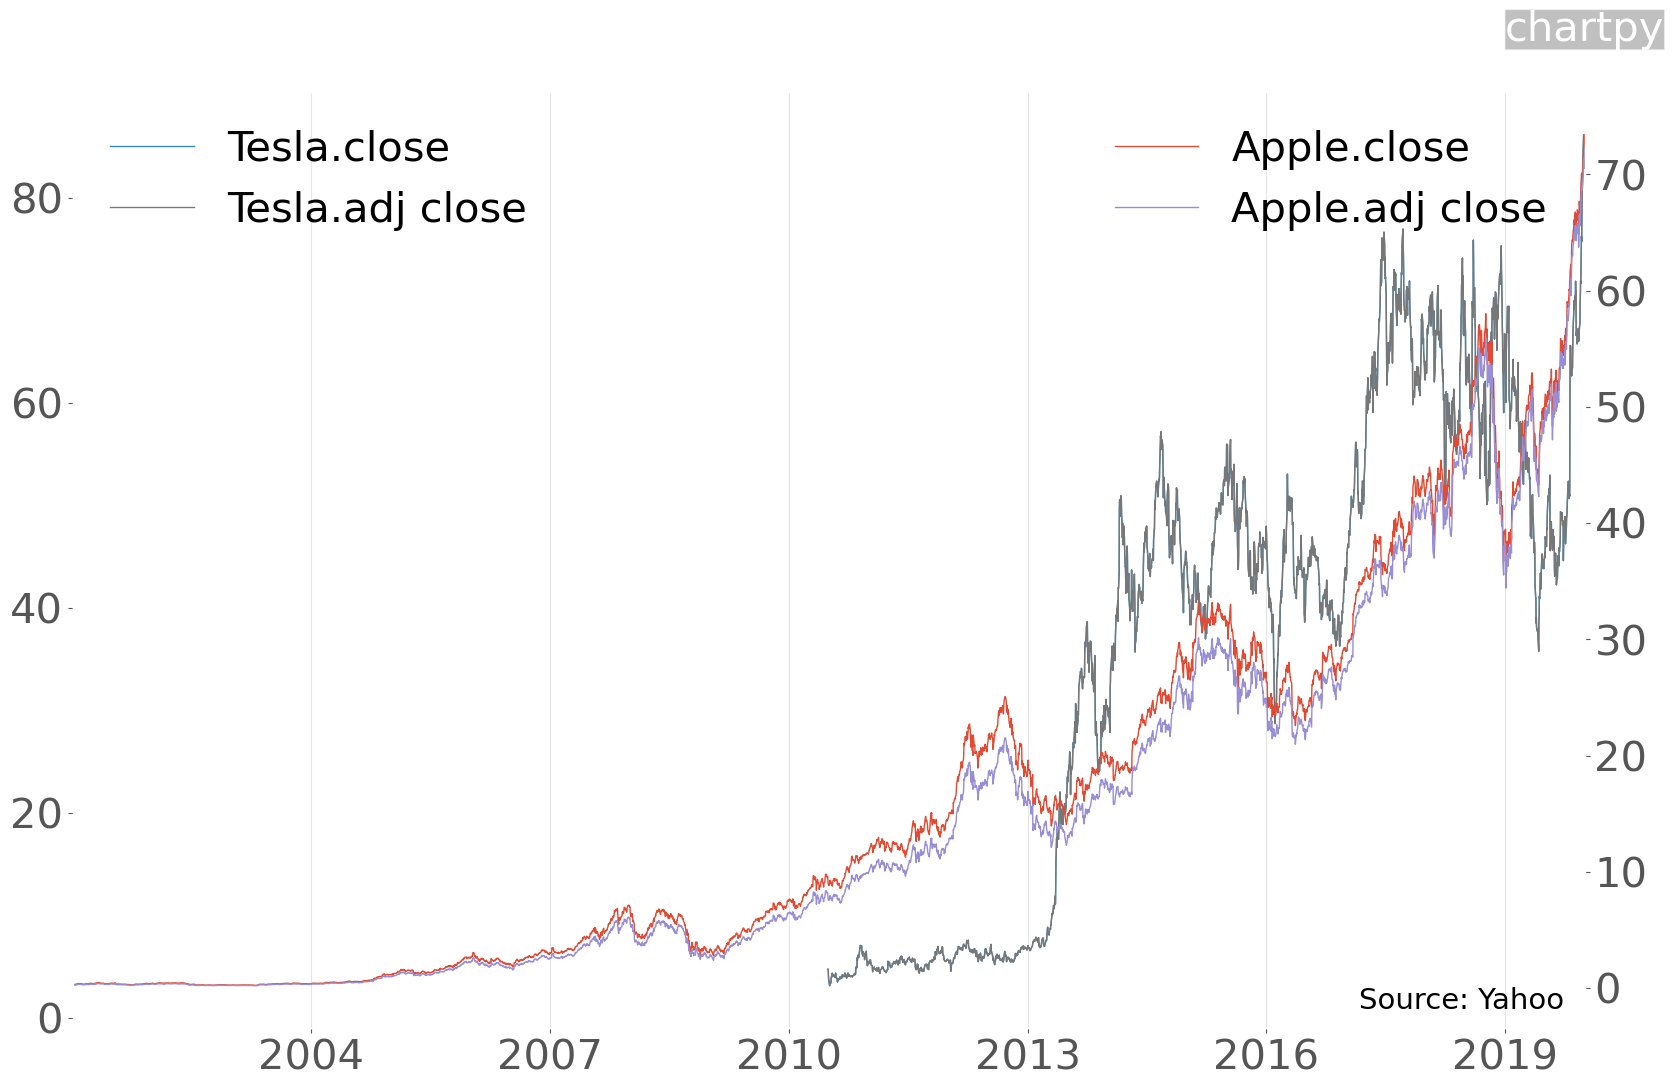

In [8]:
Chart(engine='matplotlib').plot(df_yahoo, style=Style(
    source='Yahoo', y_axis_2_series=['Apple.close', 'Apple.adj close'],
    y_axis_showgrid=False, y_axis_2_showgrid=False))

In [10]:
df_yahoo = df_yahoo.fillna(method='ffill')
df_yahoo_monthly = df_yahoo.resample('M').last()

In [12]:
df_yahoo_monthly_ret = (df_yahoo_monthly / df_yahoo_monthly.shift(1) - 1) * 100
df_yahoo_monthly_ind = 10.0 * (1.0 + df_yahoo_monthly_ret).cumprod()

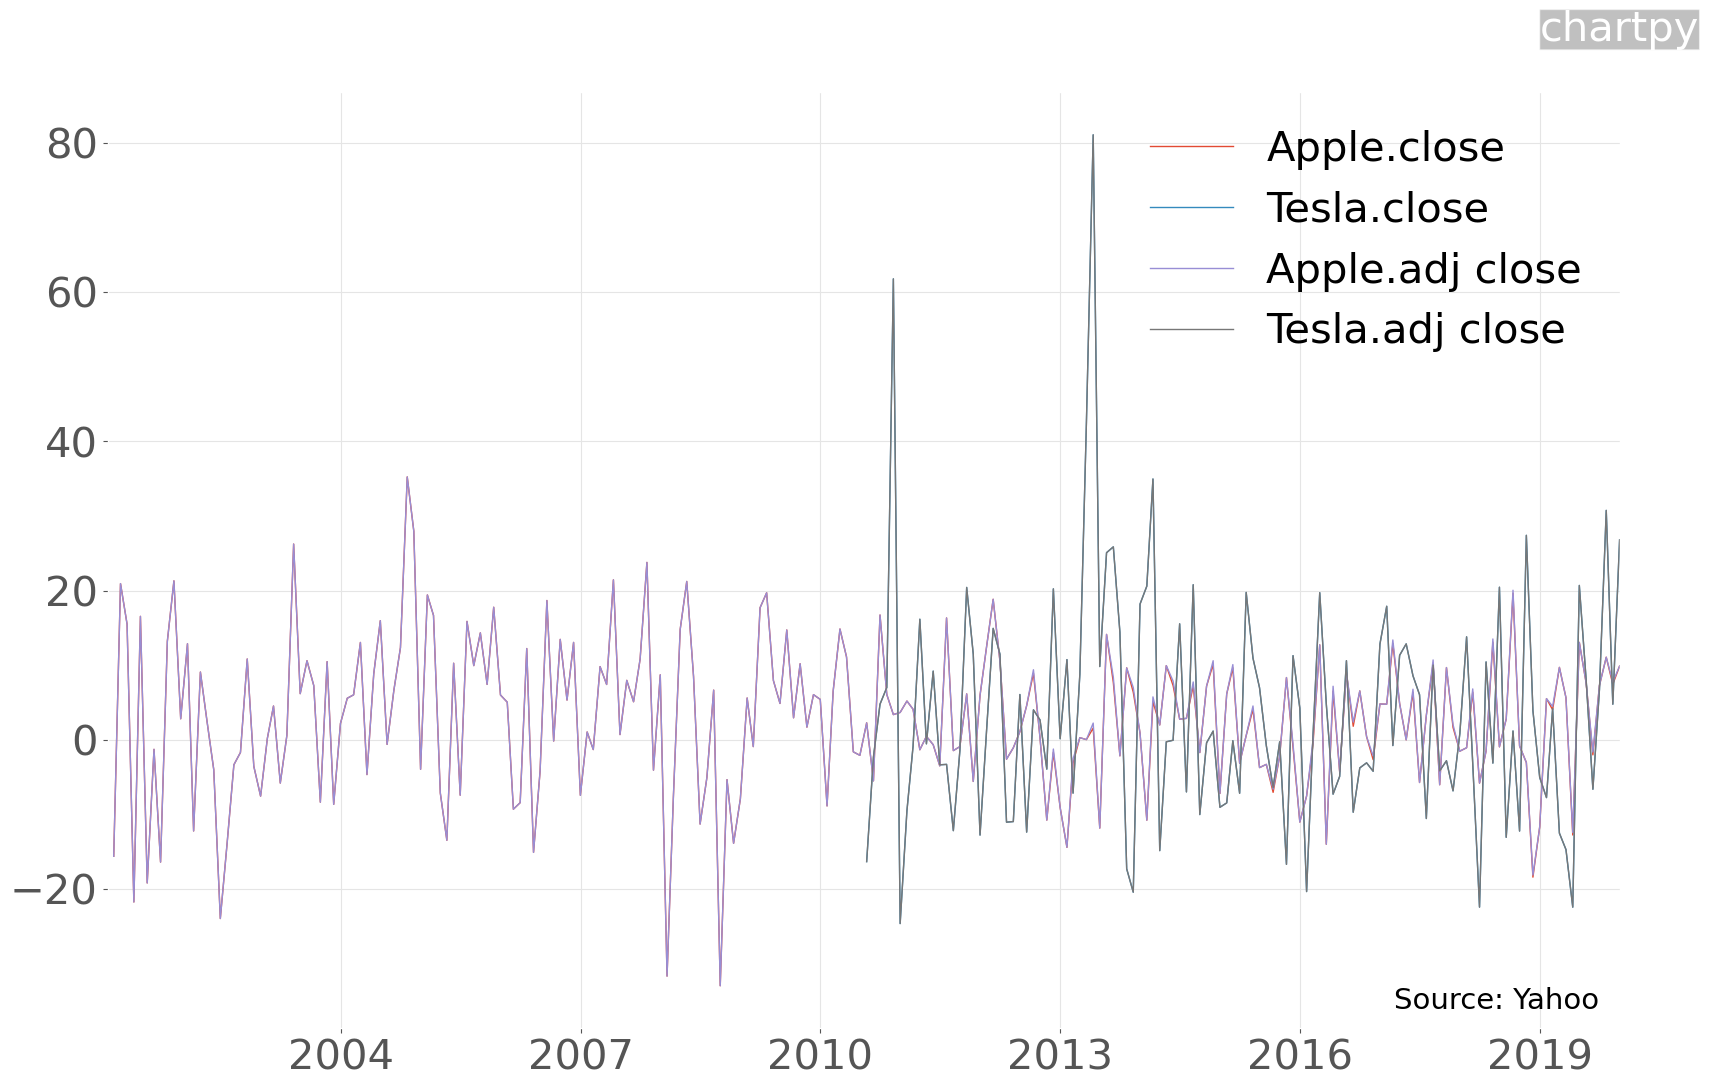

In [14]:
Chart(engine='matplotlib').plot(df_yahoo_monthly_ret, style=Style(source='Yahoo'))

In [16]:
df_yahoo_monthly_ret

,Apple.close,Tesla.close,Apple.adj close,Tesla.adj close
Date,,,,
2001-01-31,NaN,NaN,NaN,NaN
2001-02-28,-15.606957,NaN,-15.606981,NaN
2001-03-31,20.931412,NaN,20.931412,NaN
2001-04-30,15.496302,NaN,15.496302,NaN
2001-05-31,-21.734089,NaN,-21.734083,NaN
...,...,...,...,...
2019-08-31,-2.018392,-6.622237,-1.646113,-6.622237
2019-09-30,7.296157,6.763875,7.296157,6.763875
2019-10-31,11.068439,30.742729,11.068451,30.742729


In [17]:
df_yahoo_2019_ret = df_yahoo_monthly_ret[df_yahoo_monthly_ret.index>'2018-12-31']

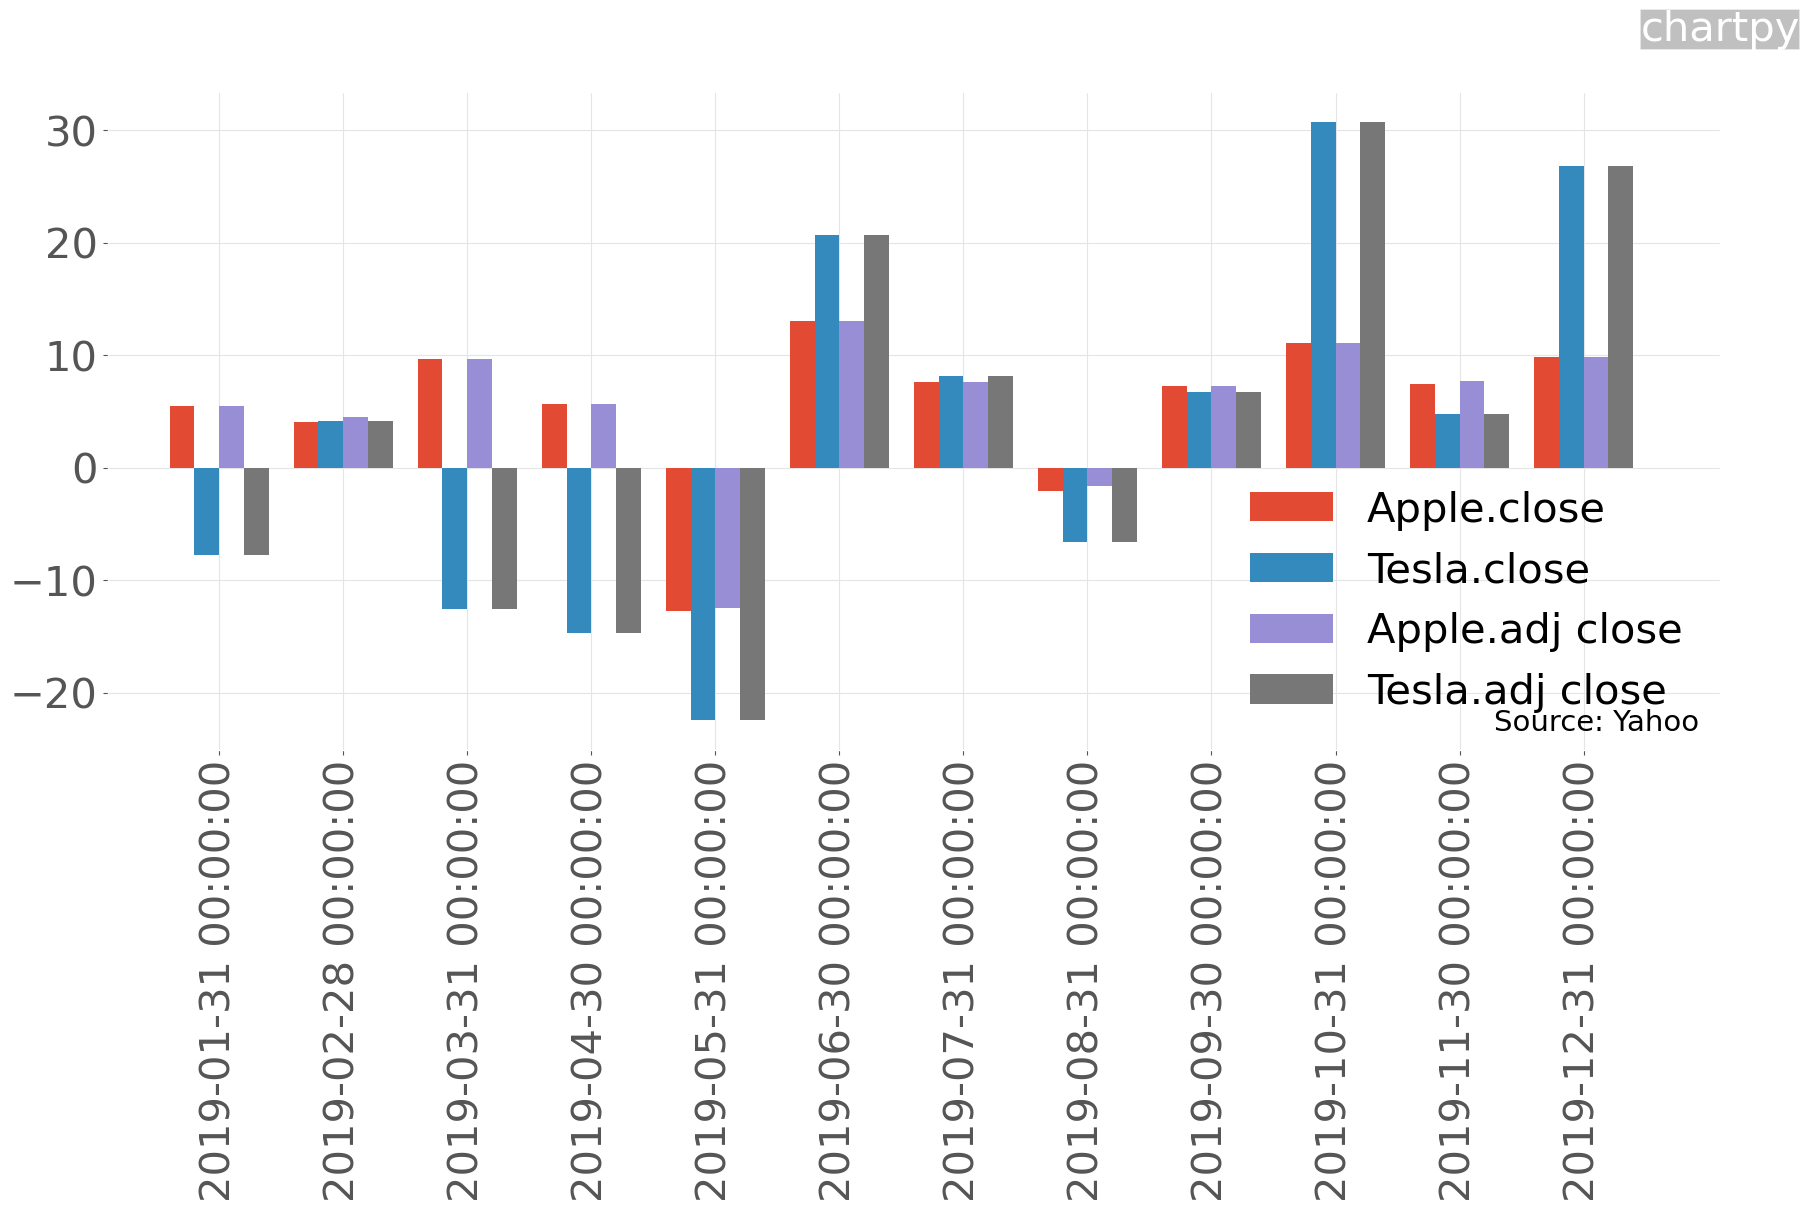

In [22]:
Chart(chart_type='bar',engine='matplotlib').plot(df_yahoo_2019_ret, style=Style(source='Yahoo'))